**тематическое моделирование**

_Евгений Борисов <esborisov@sevsu.ru>_

In [1]:
# http://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html

# разложение частотной матрицы [ слова x документы ]  
#
# получаем матрицу с описанием тем [ слова х темы ]   
# и матрицу вероятностей событий "тема описывает документ"  [ темы х документы ]
# 
# [ слова x документы ] = [ слова х темы ] * [ темы х документы ]
# 
# p(w|d) = p(w|t) * p(t|d)

## тексты

In [2]:
import numpy as np
import pandas as pd
pd.options.display.precision = 2 
pd.options.display.max_colwidth = 1000 

In [3]:
# загружаем тексты
data = pd.read_pickle('../data/news.pkl.gz')
print('записей:',len(data))
data.sample(2)

записей: 3196


,text,tag
2086,"Полузащитник ""Ромы"" Раджа Наингголан после победы над ""Миланом"" в 16-м туре чемпионата Италии (1:0) отметил, что его команда показала характер. Также он считает, что ""Рома"" находится на правильном пути.\n\n- У нас было несколько моментов, но главное, что в итоге выиграли, - цитирует Mediaset Premium Наингголана. - Сегодня вечером ""Рома"" проявила характер, так как ""Милан"" был очень хорошо организован. Мы защищались в целом хорошо, поэтому можем быть удовлетворены. К слову, в прошлом сезоне мы не выигрывали матчи, подобные сегодняшнему, поэтому можно сказать, что ""Рома"" находится на правильном пути и нужно продолжать верить в себя. Впереди еще один тяжелый матч против ""Ювентуса"", но мы постараемся выиграть.",sport
2915,"Об этом сообщают зарубежные источники, которые говорят о большом пикапе ориентированном преимущественно на американский авторынок.\n\nНа данный момент в компании рассматривают возможность создания нового пикапа, который мог бы оказаться больше Amarok, а также позволил улучшить позиции компании после дизельного скандала. С этой же целью производитель создавал и внедорожник Atlas.\n\nВ компании уверены, что подобные этой модели автомобили смогут в будущем занять большую часть продаж сегмента. В Volkswagen объяснили, что пока не торопятся с выпуском большого пикапа. Руководство будет отталкиваться от результатов продаж нового Atlas\n\n\n\n",auto


In [4]:
len( data.drop_duplicates('text') )

3196

## токенайзер

In [5]:
import re
from nltk.tokenize import word_tokenize as nltk_tokenize_word

In [6]:
# def tokenizer(text):
#     return [
#             t for t in nltk_tokenize_word( # разбиваем текст на слова
#                 re.sub(r'</?[a-z]+>',' ',text), # удаляем xml tag 
#                 language='russian'
#             ) 
#         ]

In [7]:
# from nltk.stem.snowball import SnowballStemmer
# stemmer = SnowballStemmer('russian')

from nltk.corpus import stopwords as nltk_stopwords
stopwords = set(nltk_stopwords.words('russian'))

def tokenizer(text,stopwords=stopwords):
    return [
            t for t in nltk_tokenize_word( # разбиваем текст на слова
                re.sub(r'</?[a-z]+>',' ',text), # удаляем xml tag 
                language='russian'
            ) 
            if not (
               False
               or (len(t)<3) # выкидываем очень короткие слова
               or re.match(r'^[^a-zA-ZЁёА-я]+$', t) # выкидываем токены не содержащие букв
               or re.match(r'^(\w)\1+$', t)  # выкидываем токены из одного повторяющегося символа
               or re.match(r'^[^a-zA-ZЁёА-я].*$', t)  # выкидываем токены начинающиеся не с буквы
               or (t in stopwords) # выкидываем предлоги, союзы и т.п.    
            )
        ] 

## выполняем частотный анализ

In [8]:
# from sklearn.feature_extraction.text import CountVectorizer
# tf_model = CountVectorizer(
#         min_df=.01, # выкидываем очень редкие слова
#         max_df=.10, # выкидываем очень частые слова
#         tokenizer=tokenizer, # ф-ция токенайзер
#         token_pattern=None, # отключаем дефолтный токенайзер
#         # binary=True,
#     )

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_model = TfidfVectorizer(
        min_df=.01, # выкидываем очень редкие слова
        max_df=.10, # выкидываем очень частые слова
        use_idf=False, # не используем обратную частоту
        norm='l2', # нормируем TF
        tokenizer=tokenizer, # ф-ция токенайзер
        token_pattern=None, # отключаем дефолтный токенайзер
    )

In [10]:
%%time

data_tf = tf_model.fit_transform( data['text'] )

display(data_tf.shape)

(3196, 2021)

CPU times: user 5.37 s, sys: 9.61 ms, total: 5.38 s
Wall time: 5.38 s


In [11]:
vocab = sorted(tf_model.vocabulary_)
display(len(vocab))
display(vocab)

2021

['adobe',
 'afisha.tut.by',
 'apple',
 'audi',
 'auto.tut.by',
 'facebook',
 'finance.tut.by',
 'flash',
 'html5',
 'http',
 'javascript',
 'journal',
 'kia',
 'lenta.ru',
 'news',
 'player',
 'realty.tut.by',
 'regnum',
 'reuters',
 'sport.tut.by',
 'street',
 'telegram',
 'the',
 'times',
 'tut.by',
 'twitter',
 'volkswagen',
 'wall',
 'youtube',
 'абсолютно',
 'аварии',
 'авария',
 'августа',
 'августе',
 'авто',
 'автобуса',
 'автомобилей',
 'автомобилем',
 'автомобили',
 'автомобиль',
 'автомобиля',
 'автор',
 'авторы',
 'агентства',
 'агентство',
 'администрации',
 'адрес',
 'актер',
 'активно',
 'активность',
 'акции',
 'акций',
 'александр',
 'александра',
 'александром',
 'алексей',
 'алеппо',
 'американская',
 'американские',
 'американский',
 'американских',
 'американского',
 'американской',
 'америки',
 'анализ',
 'аналитики',
 'андрей',
 'андрея',
 'анна',
 'армии',
 'ассоциации',
 'атмосферу',
 'базе',
 'базовой',
 'банк',
 'банка',
 'безопасности',
 'беларуси',
 'белару

## извлечение списка тем и ключевых слов

In [12]:
def extract_topics( components, feature_names, n_top_words=5 ):
    return {
        topic_idx : [ feature_names[i] for i in topic.argsort()[:-n_top_words-1:-1] ]
        for topic_idx, topic in enumerate(components)
    }

In [13]:
# from sklearn.decomposition import LatentDirichletAllocation
# # LDA - латентное размещение Дирихле
# tm_model = LatentDirichletAllocation( 
#         n_components=10, 
#         max_iter=5,
#         learning_method='online', 
#         learning_offset=50.,
#         random_state=0, 
#     )

In [14]:
from sklearn.decomposition import NMF
# NMF (generalized Kullback-Leibler divergence) 
tm_model = NMF( 
        n_components=10,
        random_state=1, 
        beta_loss='kullback-leibler', 
        solver='mu', 
        max_iter=1000, 
        l1_ratio=.5 
    )

In [15]:
data['topic_id'] = np.argmax( tm_model.fit_transform(data_tf),axis=1)

In [16]:
topics = extract_topics( tm_model.components_, vocab )
topics

{0: ['беларуси', 'tut.by', 'беларусь', 'просто', 'нужно'],
 1: ['президент', 'президента', 'трамп', 'заявил', 'глава'],
 2: ['рублей', 'компании', 'долларов', 'млн', 'компания'],
 3: ['результате', 'дтп', 'водитель', 'мвд', 'сообщили'],
 4: ['версия', 'новый', 'видео', 'нового', 'модели'],
 5: ['народов', 'севера', 'коренных', 'рамках', 'республики'],
 6: ['ученые', 'специалисты', 'алеппо', 'университета', 'людей'],
 7: ['савченко', 'украины', 'суд', 'facebook', 'сети'],
 8: ['место', 'динамо', 'чемпионата', 'мира', 'матче'],
 9: ['стал', 'фильм', 'мира', 'лучший', 'роль']}

<AxesSubplot: xlabel='topic_id'>

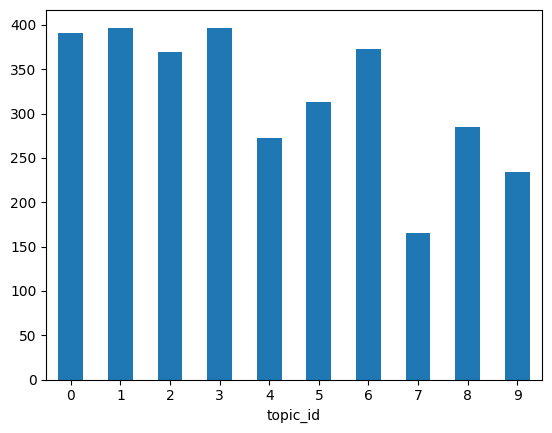

In [17]:
data.groupby(['topic_id']).size().plot.bar(rot=0)

In [18]:
data['keywords'] = data['topic_id'].map(topics)
data.sample(4)

,text,tag,topic_id,keywords
2327,"11 декабря на ул. 2-й Московской сотрудница МУ МВД России «Серпуховское», управляя личным автомобилем в неслужебное время, находясь в состоянии алкогольного опьянения, совершила наезд на мужчину и женщину, которые от полученных травм скончались на месте ДТП.\n\nПо данному факту следственным отделом по г. Серпухов ГСУ СК России по Московской области возбуждено уголовное дело по ст. 264 Уголовного кодекса Российской Федерации.\n\nСотрудница полиции задержана в порядке ст. 91 Уголовно-процессуального кодекса Российской Федерации.\n\nДля установления всех обстоятельств произошедшего назначено проведение служебной проверки, по результатам которой сотрудник будет уволен из органов внутренних дел по отрицательным мотивам и понесет наказание в соответствии с действующим законодательством, также к строгой дисциплинарной ответственности будут привлечены его непосредственные руководители.",incident,3,"[результате, дтп, водитель, мвд, сообщили]"
1018,"В Пинском районе банкротятся пять сельхозпредприятий\n\n30 ноября 2016 в 10:52\n\nСергей Веснин, Завтра твоей страны\n\nСразу 5 из 20 сельскохозяйственных предприятий Пинского района могут уйти с молотка.\n\nПинщина считается одним из лидеров по производству сельхозпродукции. Она занимает первое место в стране по товарности молока, здесь находится один из центров производства говядины. На территории района работают четыре предприятия, входящие в структуру Управления делами президента Беларуси: хозяйства «Парохонское, «Почапово», «Рыбхоз «Полесье» холдинга «Мачулищи» и филиал «Невель» Пинского мясокомбината.\n\nТем не менее даже в этом передовом регионе четверть хозяйств находятся на грани выживания.\n\nДела об экономической несостоятельности Экономический суд Брестской области возбудил в отношении сельхозпредприятий «Охово», «Плещицы», «Сошненское-агро», «Кончицы Агро» и «ПинскдревАгро».\n\nПланируется, что именно процедура банкротства позволит им улучшить финансовое положение.\n\n...",economics,5,"[народов, севера, коренных, рамках, республики]"
2655,"Учёные Эдинбургского университета нашли объекты, которые могут быть населяемы живыми организмами. Обитаемыми назвали не экзопланеты, а ""коричневых карликов"".\r\n\r\nУчёные из Великобритании рассказали, что ""коричневые карлики"" располагаются между планетами и звёздами. Габариты интересуемых объектов дважды превышают Юпитер. Отличие данного вида планет от других объектов состоит в том, что на них нет энергии и плазмы. ""Коричневые карлики"" состоят из оксигена, карбона и гидрогена, тогда как их атмосфера содержит углерод, водород и кислород. Эти вещества делают атмосферу объектов благоприятной для существования жизни.\r\n\r\nАстронавты отметили, что не стоит ожидать большого разнообразия жизни на этих объектах. Скорее всего, они обитаемы простыми микроорганизмами, так как их строение позволяет жить в богатой водородом атмосфере. Авторы теории основывают своё мнение на научном труде Карла Сагана, предположившим, что содержание света Солнца на верхних уровнях атмосферы Юпитера обеспечива...",science,6,"[ученые, специалисты, алеппо, университета, людей]"
1643,"В ближайшее время может произойти сильное извержение вулкана Безымянный, сообщает РИА Новости со ссылкой на главу Камчатской группы реагирования на вулканические извержения (KVERT) Института вулканологии и сейсмологии ДВО РАН Ольгу Гирину.\n\nПо словам эксперта, с 18 ноября сейсмическая активность исполина стала увеличиваться, а 5 декабря возросла температура тепловой аномалии.\n\n- Это свидетельствует о том, что на вершине купола вероятно выжимание блоков лавы, что предшествует сильному эксплозивному извержению вулкана, - рассказала Гирина агентству.\n\nТаким образом, пепловые выбросы до 15 километров в высоту могут произойти в любую минуту. Гирина отметила, что извержение после столь длительного ""сна"" может быть опасно для воздушного флота. Поэтому Безымянный получил ""оранжевый"" код авиационной опасности.\n\nСправка ""РГ""\n\n\n\nБезымянный, располо